Adrien ESTARDY - Nathan FAGNOU - Valentine GASNIER - MMN3

# MACHINE LEARNING : FINAL PROJECT 
## Objective : Predict the durability of Aircraft
# Introduction:
### Aerospace Structural Design Dataset Analysis

This project focuses on the analysis and predictive modeling of an aerospace structural design dataset, consisting of 1,000 observations collected from simulations and material data. The dataset aims to support the optimization of aircraft structural components by analyzing material properties, geometrical features, and computational simulation results.

The dataset contains 17 physical/geometrical variables and 4 simulation variables, totaling 21 columns  for analysis. Each variable includes essential information about materials, structural geometry, operational conditions, and performance metrics. The variables are detailed as follows: Aerospace Structural Design Dataset Analysis

---

### Dataset Overview

The dataset contains 17 physical/geometrical variables and 4 simulation variables, totaling 21 columns relevant for analysis. Each variable includes essential information about materials, structural geometry, operational conditions, and performance metrics. 

### Physical / Geometrical Variables

| Variable | Description | Unit |
|----------|-------------|------|
| Material Type | Type of material used in the structural component | Categorical |
| E (GPa) | Young’s modulus of the material | GPa |
| ν | Poisson’s ratio of the material | Dimensionless |
| ρ (kg/m³) | Density of the material | kg/m³ |
| Tensile Strength (MPa) | Maximum tensile stress before failure | MPa |
| Operational Life (years) | Expected operational life of the component | Years |
| Young’s Modulus | Alternative measure of material stiffness | GPa |
| Altitude (m) | Operational altitude | m |
| Temperature (°C) | Operational temperature | °C |
| Pressure (Pa) | Operational pressure | Pa |
| Wing Span (m) | Aircraft wing span (distance from the tip of one wing to the tip of the other wing) | m |
| Fuselage Length (m) | Aircraft fuselage length (central body of an aircraft) | m |
| Structural Thickness (mm) | Thickness of structural elements | mm |
| Structural Shape | Type of structural shape | Categorical |
| Load Distribution | Load distribution pattern on the structure | Categorical |
| Vibration Damping | Type or level of vibration damping applied | Categorical |
| Weight Efficiency | Ratio of structural performance to weight | Dimensionless / Score |

### Simulation Variables

| Variable | Description | Unit |
|----------|-------------|------|
| Computational Time | Time required for simulation | Seconds |
| Quantum Algorithm Type | Type of quantum algorithm used | Categorical |
| Number of Iterations | Number of optimization iterations | Integer |
| Optimization Time (sec) | Total optimization time | Seconds |

---

## Project Objectives

The primary goals of this project are to: Analyze relationships between material properties, structural geometry, and operational conditions. Predict the operational life of aerospace components using machine learning models.

---

This dataset provides a comprehensive view of how material choices, structural parameters, and operational conditions influence the performance and longevity of aerospace components, enabling engineers and data scientists to optimize designs efficiently and safely.

## Libraries :

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Import Dataset :

In [24]:
path_valentine = r"C:\Users\valen\OneDrive - De Vinci\cours A4 ESILV\Commun\Machine Learning\Final Project\aerospace_dataset_fixed_1000.csv"
path_adrien = r"C:\Users\adrie\OneDrive\Bureau\Projet ML\aerospace_dataset_fixed_1000.csv"
path_nathan = ""

#Creation of the dataset (do not forget to insert your path to the csv file /!\
df = pd.read_csv(path_valentine)

print("List of dataset columns :")
for col in df.columns:
    print(f"-> {col}")

List of dataset columns :
-> Material Type
-> E (GPa)
-> ν
-> ρ (kg/m³)
-> Tensile Strength (MPa)
-> Young’s Modulus
-> Altitude (m)
-> Temperature (°C)
-> Pressure (Pa)
-> Operational Life (years)
-> Wing Span (m)
-> Fuselage Length (m)
-> Structural Thickness (mm)
-> Structural Shape
-> Load Distribution
-> Vibration Damping
-> Weight Efficiency
-> Durability
-> Computational Time
-> Quantum Algorithm Type
-> Number of Iterations
-> Optimization Time (sec)


In [25]:
print("Five first rows of the dataset:\n\n")
df.head()

Five first rows of the dataset:




,Material Type,E (GPa),ν,ρ (kg/m³),Tensile Strength (MPa),Young’s Modulus,Altitude (m),Temperature (°C),Pressure (Pa),Operational Life (years),...,Structural Thickness (mm),Structural Shape,Load Distribution,Vibration Damping,Weight Efficiency,Durability,Computational Time,Quantum Algorithm Type,Number of Iterations,Optimization Time (sec)
0,Composite,141.708780,0.293017,1588.479964,583.675655,143069.963506,3120.576483,-4.737726,68696.231977,25.553339,...,18.995139,Box,Uniform,High,0.823058,1.774927,464.972886,QAOA,472,91.078003
1,Steel,219.380854,0.315615,7753.788343,1201.562861,219094.502142,4620.696669,-19.183808,57364.381209,33.771281,...,5.054841,Box,Uniform,Medium,0.632313,2.670468,314.614448,QAOA,312,59.737691
2,Aluminum,74.752119,0.330320,2744.509921,317.232722,77492.453814,11315.793409,-58.736571,24319.246429,24.753846,...,2.172047,I-Beam,Tip-loaded,Medium,0.906496,1.234871,326.959916,Grover,216,66.103227
3,Composite,137.115482,0.272466,1651.762467,602.781208,130418.034889,7324.512717,-32.577282,39937.880350,25.983752,...,6.268369,I-Beam,Tip-loaded,High,0.959128,1.979253,503.633222,Grover,337,98.600215
4,Composite,135.507927,0.284600,1507.690607,568.460070,131795.994791,10019.685428,-48.538755,29416.138129,22.148339,...,6.230518,Box,Tip-loaded,Low,0.817331,1.658538,305.710180,VQE,203,58.631572


## Dataset Analysis

In [27]:
df.info()
print(f"\nNombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Material Type              1000 non-null   object 
 1   E (GPa)                    1000 non-null   float64
 2   ν                          1000 non-null   float64
 3   ρ (kg/m³)                  1000 non-null   float64
 4   Tensile Strength (MPa)     1000 non-null   float64
 5   Young’s Modulus            1000 non-null   float64
 6   Altitude (m)               1000 non-null   float64
 7   Temperature (°C)           1000 non-null   float64
 8   Pressure (Pa)              1000 non-null   float64
 9   Operational Life (years)   1000 non-null   float64
 10  Wing Span (m)              1000 non-null   float64
 11  Fuselage Length (m)        1000 non-null   float64
 12  Structural Thickness (mm)  1000 non-null   float64
 13  Structural Shape           1000 non-null   object

In [28]:
df.describe()

,E (GPa),ν,ρ (kg/m³),Tensile Strength (MPa),Young’s Modulus,Altitude (m),Temperature (°C),Pressure (Pa),Operational Life (years),Wing Span (m),Fuselage Length (m),Structural Thickness (mm),Weight Efficiency,Durability,Computational Time,Number of Iterations,Optimization Time (sec)
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,134.840832,0.312680,4286.889575,758.639309,134855.677825,6009.094943,-24.150972,52516.845046,27.695311,49.744973,32.260435,10.958454,0.753697,1.909414,363.999970,273.004000,72.761786
std,53.238090,0.024916,2408.796571,346.206128,53271.666706,3512.475841,23.029381,22571.273436,3.952089,17.849992,10.112386,5.350864,0.121733,0.760987,190.816558,132.768307,38.153943
min,55.757287,0.250596,1450.443201,239.847353,51634.035195,47.020499,-66.734848,22305.136195,18.248961,20.009465,15.046677,2.025528,0.407369,0.264739,43.617856,50.000000,8.218741
25%,79.760258,0.292481,2623.388817,340.301832,84506.825694,2920.523492,-44.518771,32445.865466,24.607576,33.997379,23.299563,6.206527,0.669201,1.271914,199.493940,158.750000,39.716735
50%,131.921878,0.312289,4415.749924,861.198552,129064.416337,6027.917837,-24.563335,47791.161821,27.772587,49.100939,31.897790,10.774085,0.762145,1.913685,347.360948,277.500000,69.810902
75%,203.823394,0.334531,7745.423451,1174.496145,200669.046625,9109.351933,-4.000260,70443.032207,30.904554,65.866594,40.917685,15.846827,0.833732,2.527178,495.057869,391.000000,99.524571
max,222.800423,0.366443,7947.454721,1246.072775,231481.009282,11993.528173,16.740050,101367.758373,38.611363,79.925002,49.959569,19.969457,1.104632,3.585248,754.996023,499.000000,155.485217


In [29]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nNumerical columns:")
for col in numerical_cols:
    print(f"-> {col}")
print("\nCategorical columns:")
for col in categorical_cols:
    print(f"-> {col}")


Numerical columns:
-> E (GPa)
-> ν
-> ρ (kg/m³)
-> Tensile Strength (MPa)
-> Young’s Modulus
-> Altitude (m)
-> Temperature (°C)
-> Pressure (Pa)
-> Operational Life (years)
-> Wing Span (m)
-> Fuselage Length (m)
-> Structural Thickness (mm)
-> Weight Efficiency
-> Durability
-> Computational Time
-> Number of Iterations
-> Optimization Time (sec)

Categorical columns:
-> Material Type
-> Structural Shape
-> Load Distribution
-> Vibration Damping
-> Quantum Algorithm Type


In [30]:
#Division of the dataset into Physical/Geometrical features and simulation features
Physical_features = [
    'Material Type',
    'E (GPa)',
    'ν',
    'ρ (kg/m³)',
    'Tensile Strength (MPa)',
    'Operational Life (years)',
    'Young’s Modulus',
    'Altitude (m)',
    'Temperature (°C)',
    'Pressure (Pa)',
    'Wing Span (m)',
    'Fuselage Length (m)',
    'Structural Thickness (mm)',
    'Structural Shape',
    'Load Distribution',
    'Vibration Damping',
    'Weight Efficiency',
        'Durability',
]

Simulation_features = [
    'Computational Time',
    'Quantum Algorithm Type',
    'Number of Iterations',
    'Optimization Time (sec)'
]

# Creation of two new datasets :
# -> One related to physical features
# -> One related to simulation features

df_physical = df[Physical_features]
df_simulation = df[Simulation_features]



## Visualization of Data

### i) Distribution of regression target variable: Operational Life

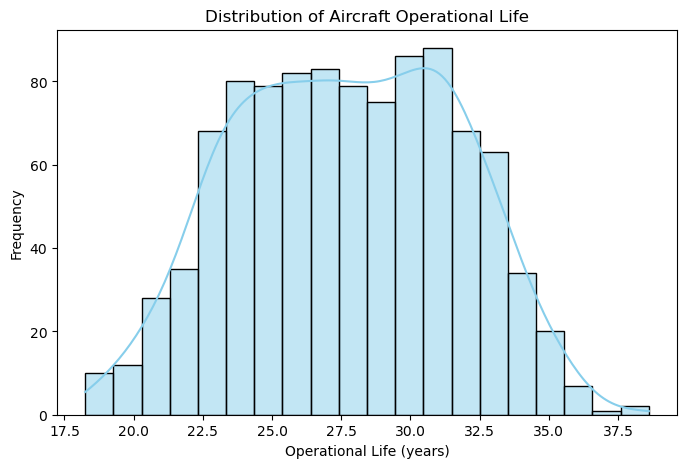

In [33]:
plt.figure(figsize=(8,5))
sns.histplot(df['Operational Life (years)'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Aircraft Operational Life')
plt.xlabel('Operational Life (years)')
plt.ylabel('Frequency')
plt.show()

The histogram of operational life visualizes the distribution of aircraft component lifespans, showing that most values are concentrated between 22 and 32 years. This graph helps identify general patterns and potential outliers in the dataset. From the histogram, it is clear that the majority of components have a lifespan within this range, suggesting that the dataset represents standard operational lifetimes and that there are no extreme outliers affecting the analysis.

## ii ) Boxplot of Operational Life by Material Type

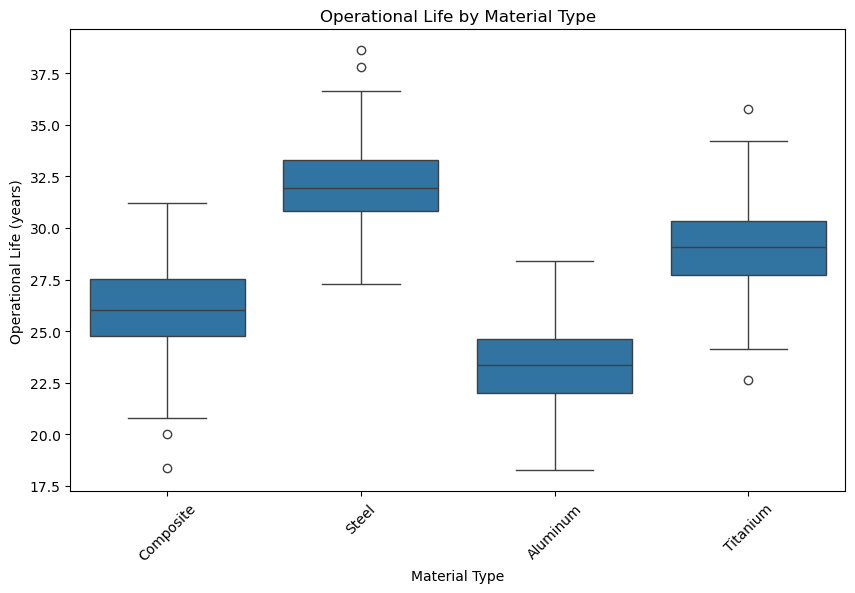

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Material Type', y='Operational Life (years)', data=df)
plt.title('Operational Life by Material Type')
plt.xlabel('Material Type')
plt.ylabel('Operational Life (years)')
plt.xticks(rotation=45)
plt.show()

The boxplot comparing operational life across different material types illustrates how material choice affects component lifespan. Composite materials have lifespans between 25 and 27.5 years, steel between 31 and 33 years, aluminum between 22.5 and 24.5 years, and titanium between 28 and 31 years. This graph shows the variability and central tendency for each material, highlighting that steel and titanium components generally last longer, while aluminum has the shortest lifespan, indicating material selection is a key factor in structural longevity.

### iii) Boxplot: Operational Life by Structural Shape

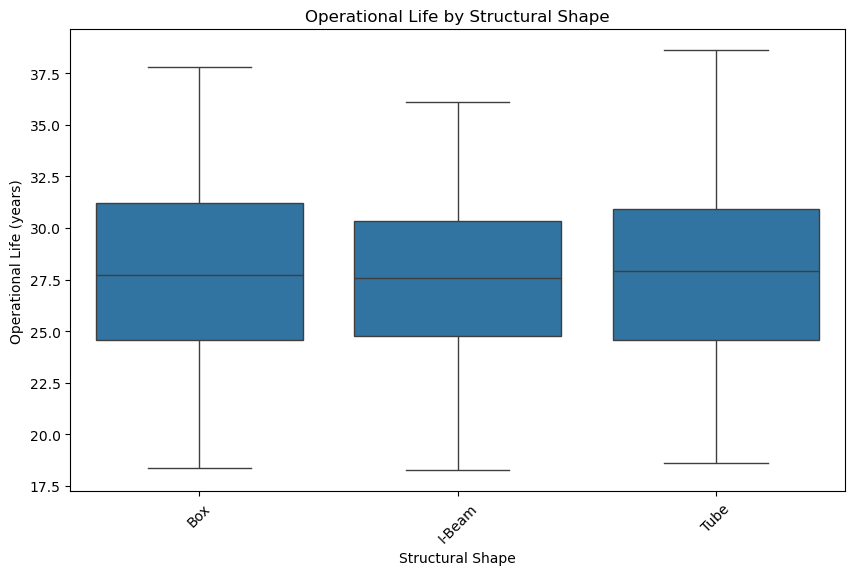

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Structural Shape', y='Operational Life (years)', data=df)
plt.title('Operational Life by Structural Shape')
plt.xlabel('Structural Shape')
plt.ylabel('Operational Life (years)')
plt.xticks(rotation=45)
plt.show()

The boxplot of operational life by structural shape demonstrates the influence of geometry on lifespan. Box-shaped components range between 24 and 31 years, I-beams between 25 and 30 years, and tubes between 24 and 30.5 years. This visualization shows that operational life is fairly consistent across shapes, with slight variations, suggesting that while design geometry has some effect on lifespan, it is less critical than material choice.

### iv) Scatter plot: Tensile Strength vs Operational Life

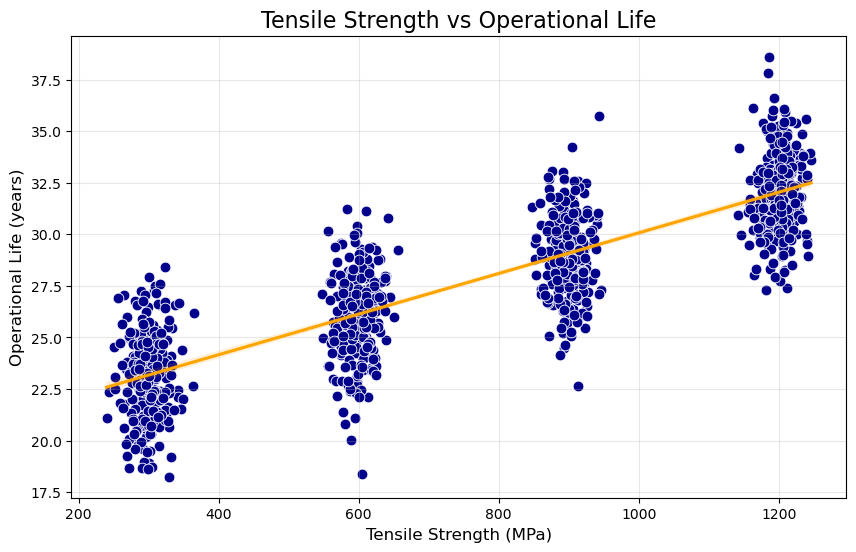

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df_physical['Tensile Strength (MPa)'],
    y=df_physical['Operational Life (years)'],
    color='darkblue',
    s=60
)

plt.title('Tensile Strength vs Operational Life', fontsize=16)
plt.xlabel('Tensile Strength (MPa)', fontsize=12)
plt.ylabel('Operational Life (years)', fontsize=12)
plt.grid(alpha=0.3)

# Optional: add a trend line
sns.regplot(
    x=df_physical['Tensile Strength (MPa)'],
    y=df_physical['Operational Life (years)'],
    scatter=False, color='orange'
)

plt.show()

The scatter plot of Tensile Strength versus Operational Life shows a clear positive relationship between material strength and component lifespan. When tensile strength is around 300 MPa, the operational life ranges between 17 and 28 years. For materials with tensile strength near 600 MPa, the operational life increases to approximately 22 to 31 years. Components with very high tensile strength, around 1200 MPa, exhibit the longest lifespans, between 27.5 and 38 years. This indicates that stronger materials tend to have longer operational lives, highlighting the importance of material selection in aerospace structural design.

### Data imbalance 

(à compléter)


The entropy of different classes of vibration damping is 1.5813, which is very close to the maximum possible entropy of 1.5850. This means that the distribution of our vibration damping classes is almost perfectly balanced. The entropy ratio of 0.998 confirms that there is very little imbalance, so no major corrective action is needed for this variable.


## Data Preprocessing

In this section, we summarize the data preprocessing steps used before training the models:

1. Missing values: check if any feature contains `NaN` values. If necessary, we could drop or impute these values, but here the dataset does not contain missing values.
2. Duplicates: detect duplicated rows to avoid biasing the models.

In [49]:
#Number of missing values in the dataset
df.isna().sum()

Material Type                0
E (GPa)                      0
ν                            0
ρ (kg/m³)                    0
Tensile Strength (MPa)       0
Young’s Modulus              0
Altitude (m)                 0
Temperature (°C)             0
Pressure (Pa)                0
Operational Life (years)     0
Wing Span (m)                0
Fuselage Length (m)          0
Structural Thickness (mm)    0
Structural Shape             0
Load Distribution            0
Vibration Damping            0
Weight Efficiency            0
Durability                   0
Computational Time           0
Quantum Algorithm Type       0
Number of Iterations         0
Optimization Time (sec)      0
dtype: int64

There is no missing values in the dataset

In [51]:
#Number of duplicates in the dataset
print(df.duplicated().sum())

0


There is no duplicate values in the dataset

## Outliers of the dataset

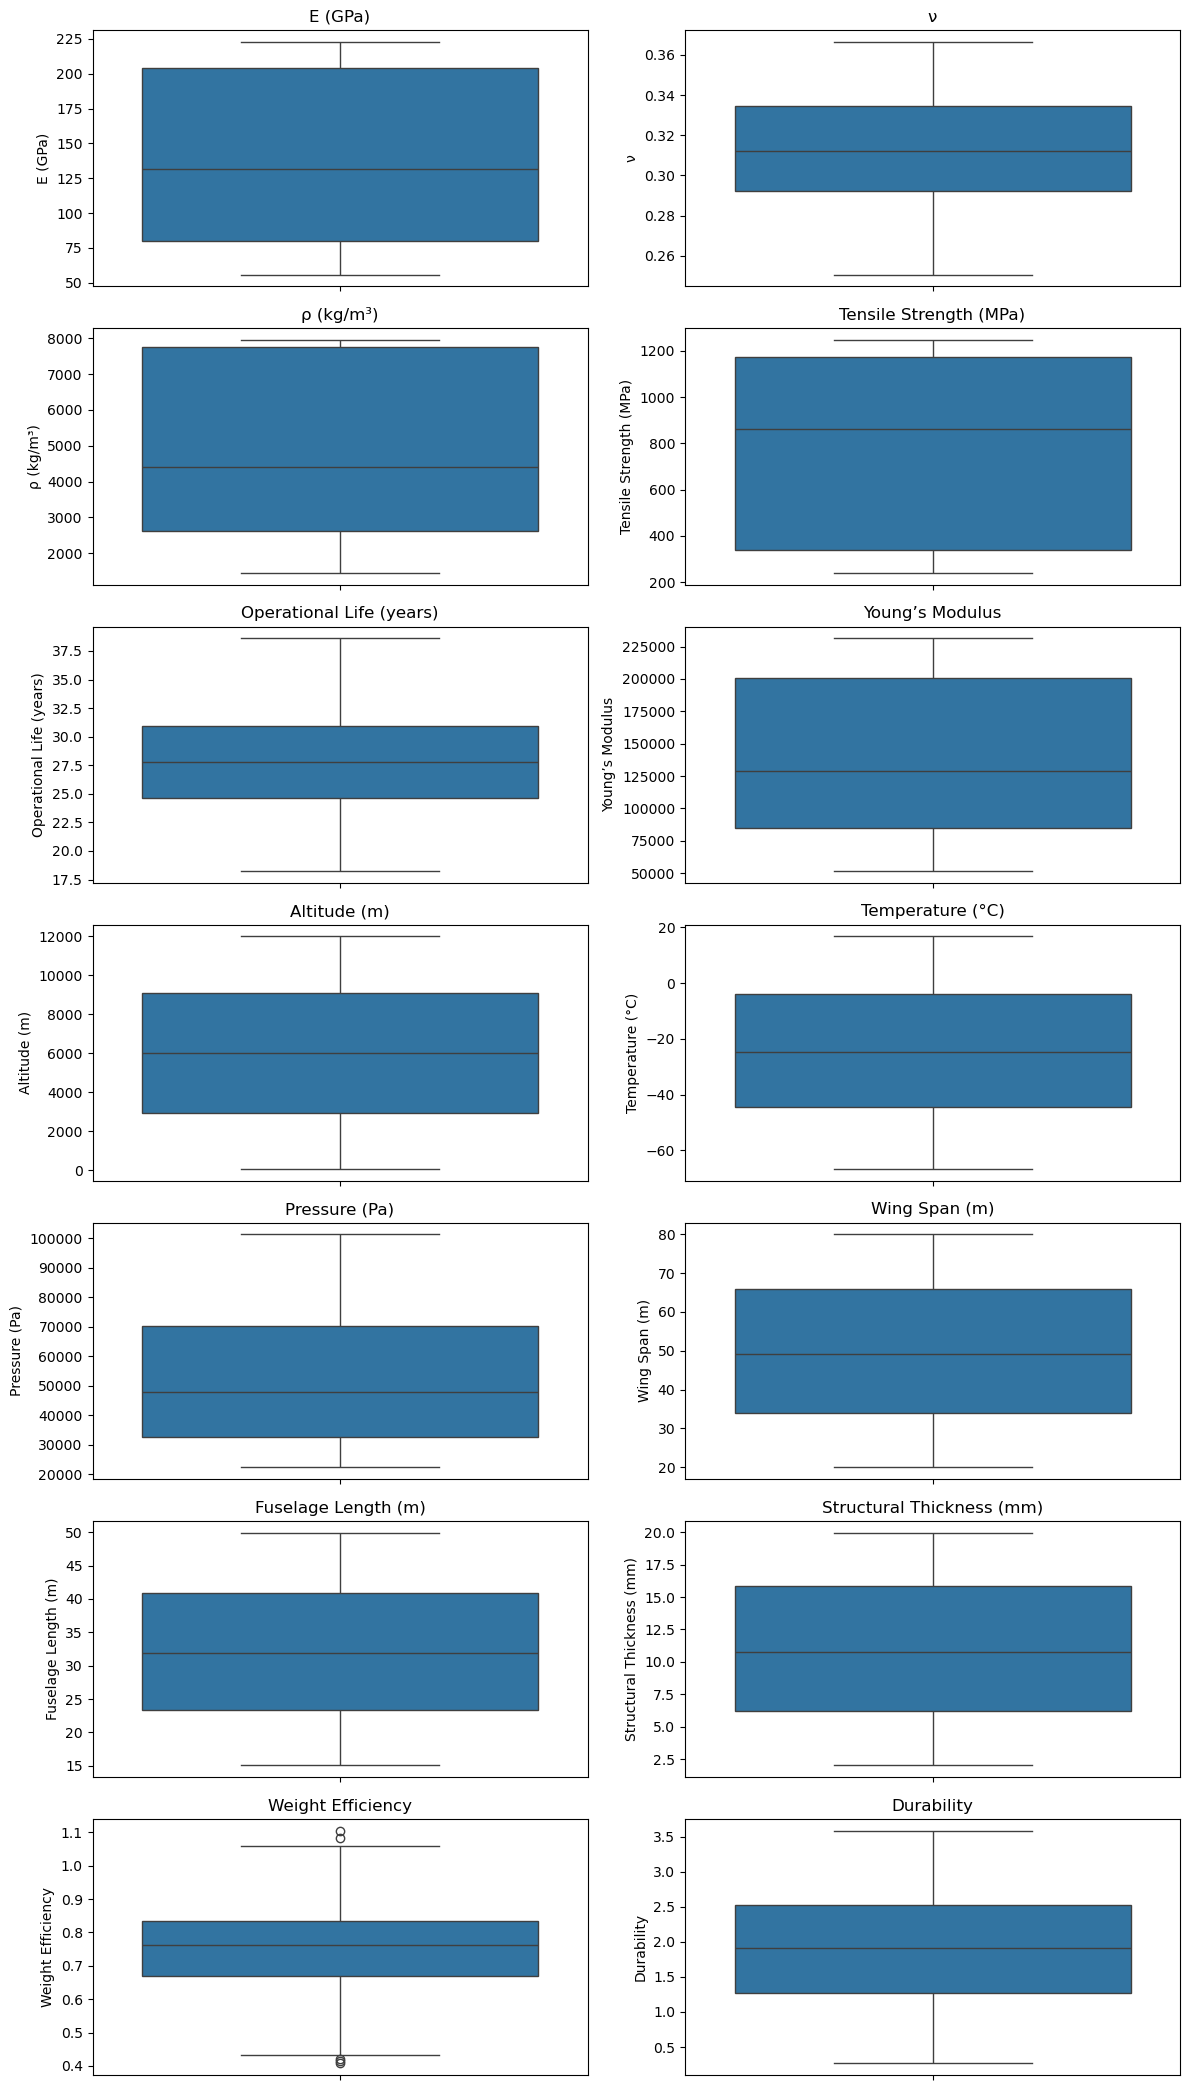

In [54]:

# Numerical Physical features
numerical_features = df_physical.select_dtypes(include='number')
n_cols = len(numerical_features.columns)

# Définir le nombre de colonnes du plot
n_plot_cols = 2
n_plot_rows = math.ceil(n_cols / n_plot_cols)  # calcule automatiquement le nb de lignes

fig, axes = plt.subplots(n_plot_rows, n_plot_cols, figsize=(12, n_plot_rows*3))

axes = axes.reshape(-1)

for i, col in enumerate(numerical_features.columns):
    sns.boxplot(y=df_physical[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

There is no outliers in the structural features in the dataset according to the previous boxplots apart from the weigh efficiency that we will transform

## Encoding

In [57]:
print(df_physical.columns)

Index(['Material Type', 'E (GPa)', 'ν', 'ρ (kg/m³)', 'Tensile Strength (MPa)',
       'Operational Life (years)', 'Young’s Modulus', 'Altitude (m)',
       'Temperature (°C)', 'Pressure (Pa)', 'Wing Span (m)',
       'Fuselage Length (m)', 'Structural Thickness (mm)', 'Structural Shape',
       'Load Distribution', 'Vibration Damping', 'Weight Efficiency',
       'Durability'],
      dtype='object')


In [58]:
#(à revoir)
df_physical = df_physical.copy()

# Ordinal columns: LabelEncoder

ordinal_cols = ['Material Type','Vibration Damping', 'Weight Efficiency', 'Durability']
label = LabelEncoder()
for col in ordinal_cols:
    df_physical[col] = label.fit_transform(df_physical[col])

df_physical.head()

,Material Type,E (GPa),ν,ρ (kg/m³),Tensile Strength (MPa),Operational Life (years),Young’s Modulus,Altitude (m),Temperature (°C),Pressure (Pa),Wing Span (m),Fuselage Length (m),Structural Thickness (mm),Structural Shape,Load Distribution,Vibration Damping,Weight Efficiency,Durability
0,1,141.708780,0.293017,1588.479964,583.675655,25.553339,143069.963506,3120.576483,-4.737726,68696.231977,44.852033,22.298464,18.995139,Box,Uniform,0,725,439
1,2,219.380854,0.315615,7753.788343,1201.562861,33.771281,219094.502142,4620.696669,-19.183808,57364.381209,22.673398,41.777220,5.054841,Box,Uniform,2,168,803
2,0,74.752119,0.330320,2744.509921,317.232722,24.753846,77492.453814,11315.793409,-58.736571,24319.246429,67.066493,48.177098,2.172047,I-Beam,Tip-loaded,2,900,236
3,1,137.115482,0.272466,1651.762467,602.781208,25.983752,130418.034889,7324.512717,-32.577282,39937.880350,60.722794,40.089302,6.268369,I-Beam,Tip-loaded,0,955,523
4,1,135.507927,0.284600,1507.690607,568.460070,22.148339,131795.994791,10019.685428,-48.538755,29416.138129,48.368268,45.851337,6.230518,Box,Tip-loaded,1,709,386


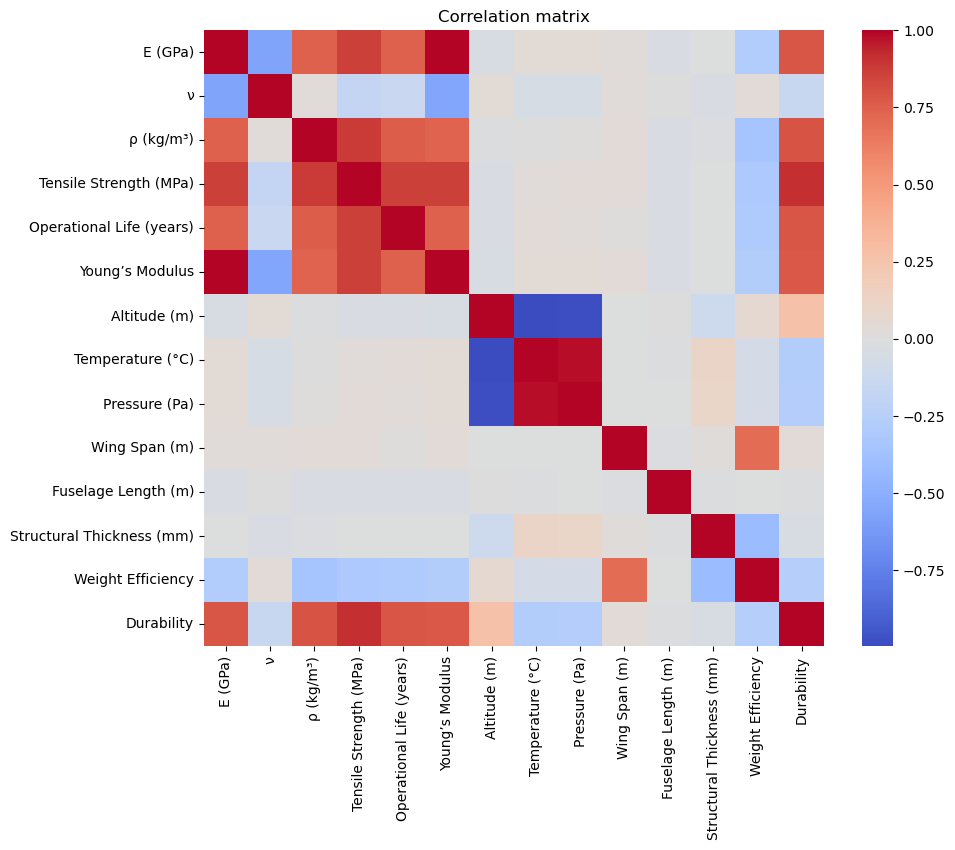

In [59]:
# Correlation matrix
corr_matrix = numerical_features.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

The correlation matrix reveals that many features in the dataset are interrelated, such as temperature and pressure, which show a strong connection. Importantly, the matrix highlights the variables most strongly correlated with Operational Life, providing insight into which factors influence component lifespan. These include Durability, Young’s Modulus, Tensile Strength, Density (ρ), Elastic Modulus (E), and Material Type. This information is valuable for identifying the key predictors for machine learning models and for guiding design decisions, as these features have the greatest impact on operational performance.

## I) Regression Model
-> We aim to predict the operational life of an aircraft based on the physical data input into our model, achieving the highest possible accuracy.

## Feature selection

In [63]:
corr_with_target = corr_matrix['Operational Life (years)'].abs()
selected_features = corr_with_target[corr_with_target >= 0.20].index.tolist()

print("\nSelected Features with correlation >= 0.20:")
for col in selected_features:
    print(f"-> {col}")
    
# Remove target
selected_features.remove('Operational Life (years)')


Selected Features with correlation >= 0.20:
-> E (GPa)
-> ρ (kg/m³)
-> Tensile Strength (MPa)
-> Operational Life (years)
-> Young’s Modulus
-> Weight Efficiency
-> Durability


### Scaling and Train / Test Split

- Scaling: although tree‑based models such as Random Forests do not require feature scaling, other algorithms used in machine learning (like SVMs or gradient‑based methods) usually benefit from standardizing the numerical features. This can be done with `StandardScaler` inside a `Pipeline`.
- Train / test split: in the regression section below, the dataset is divided into training and test sets using `train_test_split(X, y, test_size=0.2, random_state=42)`. This ensures that model evaluation is done on data that was not seen during training and provides an unbiased estimate of performance.

In [66]:
#Split features/target:
X = df_physical[selected_features]
y = df_physical['Operational Life (years)']
X.head()

,E (GPa),ρ (kg/m³),Tensile Strength (MPa),Young’s Modulus,Weight Efficiency,Durability
0,141.708780,1588.479964,583.675655,143069.963506,725,439
1,219.380854,7753.788343,1201.562861,219094.502142,168,803
2,74.752119,2744.509921,317.232722,77492.453814,900,236
3,137.115482,1651.762467,602.781208,130418.034889,955,523
4,135.507927,1507.690607,568.460070,131795.994791,709,386


In [67]:
# Common train / test split for all models
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

## Normalization

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

## PCA

In [71]:
pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of principal components retained: {X_train_pca.shape[1]}")

Number of principal components retained: 3


### i) Linear Regression

In [73]:
# Dictionnaire des résultats
baseline_results = {}

lin_reg_pca = LinearRegression()
lin_reg_pca.fit(X_train_pca, y_train)

y_pred_pca = lin_reg_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

baseline_results["Linear Regression + PCA"] = (mse_pca, r2_pca)

# Affichage
print(" Linear Regression with PCA Results")
print(f" Mean Squared Error : {mse_pca:.2f}")
print(f" R² Score           : {r2_pca:.2f}")

 Linear Regression with PCA Results
 Mean Squared Error : 4.74
 R² Score           : 0.70


### ii) Random Forest Regressor

 Random Forest Results
 Mean Squared Error : 4.73
 R² Score           : 0.71

 Feature Importances:
                  Feature  Importance
2  Tensile Strength (MPa)    0.680506
1               ρ (kg/m³)    0.132162
3         Young’s Modulus    0.052596
0                 E (GPa)    0.049512
5              Durability    0.043450
4       Weight Efficiency    0.041774


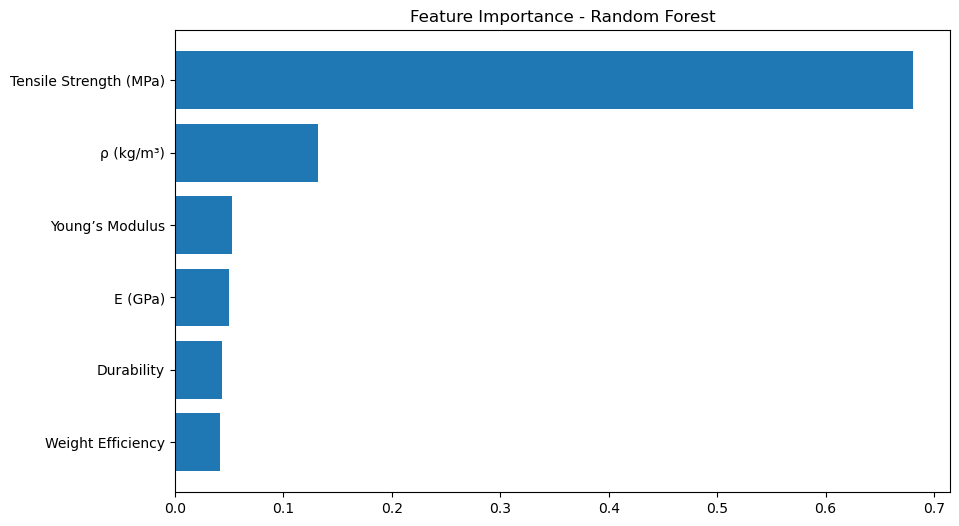

In [75]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
baseline_results["Random Forest (baseline)"] = (mse, r2)

print(" Random Forest Results")
print(f" Mean Squared Error : {mse:.2f}")
print(f" R² Score           : {r2:.2f}")
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n Feature Importances:")
print(importances)

plt.figure(figsize=(10,6))
plt.barh(importances['Feature'], importances['Importance'])
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


Conclusion: [A FAIRE]

### iii) Decison Tree Regressor

In [78]:
dt_base = DecisionTreeRegressor(
    random_state=42
)
dt_base.fit(X_train_scaled, y_train)

y_pred_dt = dt_base.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

baseline_results["Decision Tree (baseline)"] = (mse_dt, r2_dt)

print(" Decision Tree Regressor Results")
print(f" Mean Squared Error : {mse_dt:.2f}")
print(f" R² Score           : {r2_dt:.2f}")

 Decision Tree Regressor Results
 Mean Squared Error : 7.76
 R² Score           : 0.52


### iv) SVM Regressor

In [80]:
svr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

svr_pipeline.fit(X_train_scaled, y_train)

y_pred_svr = svr_pipeline.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

baseline_results["SVR (baseline)"] = (mse_svr, r2_svr)

print(" SVM Regressor Results")
print(f" Mean Squared Error : {mse_svr:.2f}")
print(f" R² Score           : {r2_svr:.2f}")

 SVM Regressor Results
 Mean Squared Error : 4.21
 R² Score           : 0.74


### v) SVM Regressor Optimizes with GridSearchCV

In [82]:
# Pipeline + hyperparameter grid for SVR
svr_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

param_grid_svr = {
    "svr__kernel": ["rbf", "linear"],
    "svr__C": [0.1, 1, 10, 100],
    "svr__gamma": ["scale", "auto"]
}

grid_svr = GridSearchCV(
    estimator=svr_pipe,
    param_grid=param_grid_svr,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_svr.fit(X_train_scaled, y_train)

print("Best parameters for SVR:")
print(grid_svr.best_params_)

# Evaluation with best SVR model
best_svr = grid_svr.best_estimator_
y_pred_svr_best = best_svr.predict(X_test_scaled)

mse_svr_best = mean_squared_error(y_test, y_pred_svr_best)
r2_svr_best = r2_score(y_test, y_pred_svr_best)

baseline_results["SVR Optimized"] = (mse_svr_best, r2_svr_best)
print(" SVM Regressor Optimized Results")
print(f" Mean Squared Error : {mse_svr_best:.2f}")
print(f" R² Score           : {r2_svr_best:.2f}")

Best parameters for SVR:
{'svr__C': 1, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
 SVM Regressor Optimized Results
 Mean Squared Error : 4.15
 R² Score           : 0.74


### Conclusion on Baseline models performance

In [84]:
print("CONCLUSION:Baseline models performance:")
for name, (mse, r2) in baseline_results.items():
    print(f"{name:25s} -> MSE = {mse:.3f} | R² = {r2:.3f}")

CONCLUSION:Baseline models performance:
Linear Regression + PCA   -> MSE = 4.735 | R² = 0.705
Random Forest (baseline)  -> MSE = 4.729 | R² = 0.705
Decision Tree (baseline)  -> MSE = 7.759 | R² = 0.516
SVR (baseline)            -> MSE = 4.212 | R² = 0.737
SVR Optimized             -> MSE = 4.146 | R² = 0.741


# Final Conclusion

In this project, we aimed to predict the operational life of aerospace structural components using a dataset combining physical, geometrical, and simulation variables. The dataset contained 21 features, including material properties, structural dimensions, operational conditions, and computational simulation results. Our goal was to develop predictive models that could assist engineers in optimizing aircraft designs for durability and performance.

| Model | MSE | R² |
|-------|-----|----|
| Linear Regression + PCA | 4.735 | 0.705 |
| Random Forest (baseline) | 4.729 | 0.705 |
| Decision Tree (baseline) | 7.759 | 0.516 |
| SVR (baseline) | 4.212 | 0.737 |
| SVR Optimized | 4.146 | 0.741 |

- Linear Regression with PCA achieved moderate predictive performance, showing that linear relationships explain a significant portion of the variance in operational life. PCA reduced dimensionality while preserving 95% of the variance.
- Random Forest performed similarly to linear regression, suggesting that the dataset's relationships are largely linear or mildly non-linear.
-  Decision Tree alone performed worse, highlighting its tendency to overfit and underperform on unseen data without ensemble aggregation.
- Support Vector Regression (SVR) outperformed other models, and hyperparameter tuning further improved its performance (MSE = 4.146, R² = 0.741), demonstrating SVR's suitability for this regression task.


Our results confirm that machine learning models can reliably predict the operational life of aerospace components, supporting better design decisions. Among the models tested, the optimized SVR provided the most accurate predictions, making it a strong candidate for practical implementation in aerospace structural analysis.
